In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#loading dataset
data = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#clean and prepare data
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
data.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
data['length'] = data['message'].apply(len)


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

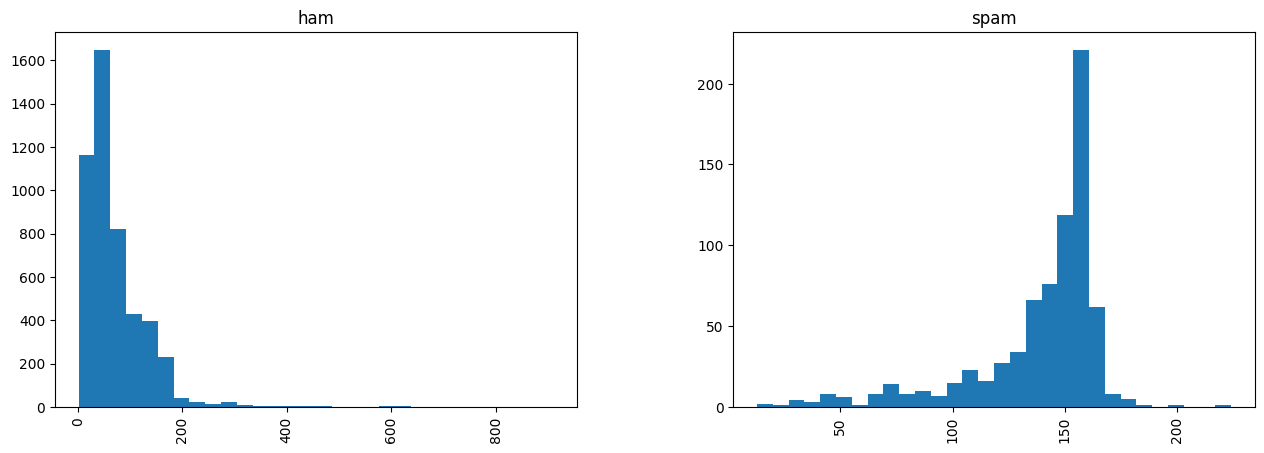

In [4]:
#data exploration
data.describe()
data.groupby('label').describe()
%matplotlib inline
data.hist(by='label', column='length', bins=30, figsize=[15, 5])


In [5]:
#label encoding
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})


In [6]:
#Train-test split
X = data.message
y = data.label_num
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)


In [7]:
#feature extraction
vect = CountVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)


In [8]:
#defining classifiers
classifiers = {
    'SVM': SVC(kernel='linear'),
    'MultinomialNB': MultinomialNB(alpha=0.2),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(solver='liblinear', penalty='l1'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=11),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=11)
}


In [9]:
#training and prediction functions
def train_model(clf, X_train, y_train):
    clf.fit(X_train, y_train)

def make_predictions(clf, X_test):
    return clf.predict(X_test)


In [10]:
#model evaluation
scores = {}
for name, clf in classifiers.items():
    train_model(clf, X_train_vect.toarray(), y_train)
    predictions = make_predictions(clf, X_test_vect.toarray())
    scores[name] = accuracy_score(y_test, predictions)

score_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Accuracy'])
score_df['Accuracy (%)'] = score_df['Accuracy'] * 100
score_df


,Accuracy,Accuracy (%)
SVM,0.989232,98.923187
MultinomialNB,0.988514,98.851400
GaussianNB,0.898062,89.806174
LogisticRegression,0.987078,98.707825
RandomForest,0.985642,98.564250
AdaBoost,0.987796,98.779612
